# 策略

> 定期定額

In [2]:
import yfinance as yf

# 下載VTI的數據
VTI = yf.download('VTI', start='2010-01-01',end='2023-12-31')
VTI

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,56.860001,57.380001,56.840000,57.310001,44.335247,2251500
2010-01-05,57.340000,57.540001,57.110001,57.529999,44.505424,1597700
2010-01-06,57.500000,57.720001,57.410000,57.610001,44.567307,2120300
2010-01-07,57.549999,57.889999,57.290001,57.849998,44.752975,1656700
2010-01-08,57.700001,58.049999,57.560001,58.040001,44.899975,1650000
...,...,...,...,...,...,...
2023-12-22,236.589996,237.520004,235.639999,236.630005,236.630005,3661900
2023-12-26,236.979996,238.309998,236.860001,237.800003,237.800003,3829400
2023-12-27,238.000000,238.440002,237.470001,238.250000,238.250000,5103700


- - -

<img src="./14.png" height="600"/>

In [3]:
import pandas as pd
import numpy as np

# 找到每個月的第一個交易日
VTI['month'] = VTI.index.to_period('M')
first_days = VTI.groupby('month').first()

# 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
first_days['investment'] = 500
first_days['shares'] = (first_days['investment'] / first_days['Adj Close']).apply(np.floor)

# 計算累計的投資金額和股數
first_days['cumulative_investment'] = first_days['investment'].cumsum()
first_days['cumulative_shares'] = first_days['shares'].cumsum()

# 計算資產總額、總投入成本、當年報酬率和總報酬率
latest_prices = VTI.groupby('month')['Adj Close'].last()
first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
first_days['total_cost'] = first_days['cumulative_investment']
first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

# 對於第一年的annual_return，使用第一年最後一天的價格與第一天的價格進行比較
first_year = first_days.index.year[0]
first_days.loc[first_days.index.year == first_year, 'annual_return'] = (first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] / first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[0] - 1) * 100

# 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
first_days['year'] = first_days.index.year
annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]

annual_summary

,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6554.647461,6000,128.0,1316.963524,9.244124
2011,12305.588882,12000,238.0,87.738379,2.546574
2012,20290.836540,18000,337.0,64.891227,12.726870
2013,33586.433304,24000,418.0,65.525129,39.943472
2014,43679.517906,30000,483.0,30.051076,45.598393
2015,49279.884796,36000,543.0,12.821494,36.888569
2016,61739.715866,42000,603.0,25.283807,46.999323
2017,80794.006142,48000,651.0,30.862290,68.320846
2018,81269.042885,54000,691.0,0.587960,50.498228


- - -

<img src="./16.png" height="400"/>

- - -

<img src="./17.png" height="600"/>

In [4]:
import pandas as pd
import numpy as np

# 找到每個月的第一個交易日
VTI['month'] = VTI.index.to_period('M')
first_days = VTI.groupby('month').first()

# 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
first_days['investment'] = 500
first_days['shares'] = (first_days['investment'] / first_days['Adj Close']).apply(np.floor)

# 計算累計的投資金額和股數
first_days['cumulative_investment'] = first_days['investment'].cumsum()
first_days['cumulative_shares'] = first_days['shares'].cumsum()

# 計算資產總額、總投入成本、當年報酬率和總報酬率
latest_prices = VTI.groupby('month')['Adj Close'].last()
first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
first_days['total_cost'] = first_days['cumulative_investment']
first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

# 對於第一年的annual_return，使用(投資現值 - 投資成本) / 投資成本 * 100%的公式
first_year = first_days.index.year[0]
first_days.loc[first_days.index.year == first_year, 'annual_return'] = ((first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] - first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) / first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) * 100

# 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
first_days['year'] = first_days.index.year
annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]
annual_summary

,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6554.647461,6000,128.0,9.244124,9.244124
2011,12305.588882,12000,238.0,87.738379,2.546574
2012,20290.836540,18000,337.0,64.891227,12.726870
2013,33586.433304,24000,418.0,65.525129,39.943472
2014,43679.517906,30000,483.0,30.051076,45.598393
2015,49279.884796,36000,543.0,12.821494,36.888569
2016,61739.715866,42000,603.0,25.283807,46.999323
2017,80794.006142,48000,651.0,30.862290,68.320846
2018,81269.042885,54000,691.0,0.587960,50.498228


- - -

寫成function

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
def get_annual_summary(stock_symbol, start_date):
    # 下載股票數據
    stock_data = yf.download(stock_symbol, start=start_date, end='2023-12-31')

    # 找到每個月的第一個交易日
    stock_data['month'] = stock_data.index.to_period('M')
    first_days = stock_data.groupby('month').first()

    # 計算每個月的投資金額和購買的股數，並將股數四捨五入到最接近的整數
    first_days['investment'] = 500
    first_days['shares'] = (first_days['investment'] / first_days['Adj Close'])

    # 計算累計的投資金額和股數
    first_days['cumulative_investment'] = first_days['investment'].cumsum()
    first_days['cumulative_shares'] = first_days['shares'].cumsum()

    # 計算資產總額、總投入成本、當年報酬率和總報酬率
    latest_prices = stock_data.groupby('month')['Adj Close'].last()
    first_days['total_value'] = first_days['cumulative_shares'] * latest_prices
    first_days['total_cost'] = first_days['cumulative_investment']
    first_days['annual_return'] = first_days['total_value'].pct_change(12) * 100  # 假設每年有12個月
    first_days['total_return'] = (first_days['total_value'] / first_days['total_cost'] - 1) * 100

    # 對於第一年的annual_return，使用(投資現值 - 投資成本) / 投資成本 * 100%的公式
    first_year = first_days.index.year[0]
    first_days.loc[first_days.index.year == first_year, 'annual_return'] = ((first_days.loc[first_days.index.year == first_year, 'total_value'].iloc[-1] - first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) / first_days.loc[first_days.index.year == first_year, 'total_cost'].iloc[-1]) * 100

    # 建立一個新的DataFrame，按年份列出資產總額、總投入成本、持股總數、當年報酬率和總報酬率
    first_days['year'] = first_days.index.year
    annual_summary = first_days.groupby('year').last()[['total_value', 'total_cost', 'cumulative_shares', 'annual_return', 'total_return']]
    
    return annual_summary


In [6]:
def get_annual_return(annual_summary):
    Total = float(annual_summary['total_value'].iloc[-1])
    cost = float(annual_summary['total_cost'].iloc[-1])
    year = float(annual_summary.shape[0])
    return ((Total / cost) ** (1 / year) - 1)*100


<img src="./21.png" height="600"/>

In [14]:
TLT_annual=get_annual_summary('TLT', '2010-01-01')
TLT_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6012.905591,6000,89.850110,0.215093,0.215093
2011,15447.593579,12000,172.260808,156.907303,28.729946
2012,21850.177214,18000,237.925446,41.447126,21.389873
2013,24486.656554,24000,307.825015,12.066169,2.027736
2014,37982.275778,30000,375.076893,55.114177,26.607586
2015,43185.567855,36000,434.230776,13.699264,19.959911
2016,49235.238079,42000,489.327014,14.008546,17.226757
2017,60030.507549,48000,546.439404,21.925901,25.063557
2018,65269.733027,54000,603.863969,8.727605,20.869876


In [15]:
get_annual_return(TLT_annual)

0.012762729755833035

In [16]:
QQQ_annual=get_annual_summary('QQQ', '2010-01-01')
QQQ_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6991.335273,6000,144.760275,16.522255,16.522255
2011,13216.603018,12000,264.466501,89.042615,10.138358
2012,21732.452956,18000,368.182738,64.432971,20.735850
2013,36938.669205,24000,458.011792,69.970087,53.911122
2014,50729.261357,30000,527.770916,37.333755,69.097538
2015,61806.334098,36000,587.570438,21.835667,71.684261
2016,72625.184541,42000,644.663928,17.504436,72.917106
2017,103155.554851,48000,690.219492,42.038269,114.907406
2018,108494.932994,54000,726.862513,5.176045,100.916543


In [17]:
get_annual_return(QQQ_annual)

10.605537901563178

In [18]:
VOO_annual=get_annual_summary('VOO', '2010-01-01')
VOO_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,2182.699693,2000,24.149765,9.134985,9.134985
2011,8235.619969,8000,89.423525,277.313471,2.945250
2012,15865.615460,14000,148.518820,92.646279,13.325825
2013,27938.995915,20000,197.556659,76.097776,39.694980
2014,38033.769669,26000,238.149078,36.131484,46.283729
2015,44570.203019,32000,275.427459,17.185868,39.281884
2016,56512.831760,38000,311.347587,26.795096,48.717978
2017,75494.982317,44000,341.557274,33.589098,71.579505
2018,77626.380885,50000,367.751536,2.823232,55.252762


In [19]:
get_annual_return(VOO_annual)

6.839972071334777

In [22]:
VT_annual=get_annual_summary('VT', '2010-01-01')
VT_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6771.820655,6000,190.204098,12.863678,12.863678
2011,11864.473772,12000,360.298189,75.203603,-1.129385
2012,20375.723645,18000,528.295792,71.737272,13.198465
2013,31801.176030,24000,670.690965,56.073848,32.504900
2014,39055.799228,30000,794.455320,22.812437,30.185997
2015,44136.042946,36000,914.823868,13.007655,22.600119
2016,54267.892986,42000,1036.733529,22.955955,29.209269
2017,74255.399169,48000,1139.450142,36.831182,54.698748
2018,72380.801134,54000,1230.853669,-2.524528,34.038521


In [23]:
get_annual_return(VT_annual)

4.92551268008794

In [24]:
VTI_annual=get_annual_summary('VTI', '2010-01-01')
VTI_annual

[*********************100%%**********************]  1 of 1 completed


,total_value,total_cost,cumulative_shares,annual_return,total_return
year,,,,,
2010,6852.767289,6000,133.821722,14.212788,14.212788
2011,12885.172605,12000,249.209616,88.028749,7.376438
2012,21337.770806,18000,354.387989,65.599418,18.543171
2013,35437.770418,24000,441.040818,66.080003,47.657377
2014,46367.396418,30000,512.722062,30.841743,54.557988
2015,52500.724074,36000,578.489444,13.227673,45.835345
2016,65796.032944,42000,642.617273,25.324049,56.657221
2017,86415.611459,48000,696.296245,31.338635,80.032524
2018,87375.642194,54000,742.922109,1.110946,61.806745


In [25]:
get_annual_return(VTI_annual)

7.007867260406031

- - -

<img src="./22.png" height="600"/>

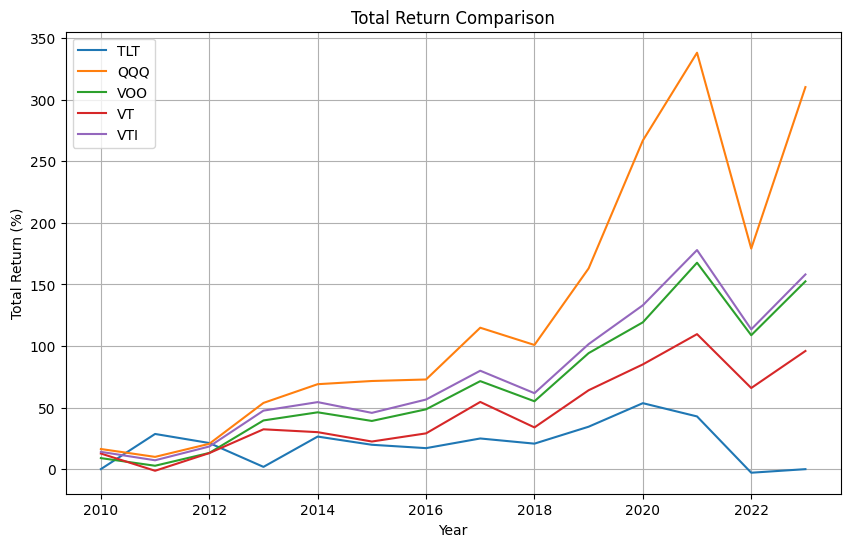

In [26]:
import matplotlib.pyplot as plt

# 合併所有的年度回報數據
annual_returns = pd.DataFrame({
    'TLT': TLT_annual['total_return'],
    'QQQ': QQQ_annual['total_return'],
    'VOO': VOO_annual['total_return'],
    'VT': VT_annual['total_return'],
    'VTI': VTI_annual['total_return']
})

# 繪製折線圖
plt.figure(figsize=(10, 6))
for column in annual_returns.columns:
    plt.plot(annual_returns.index, annual_returns[column], label=column)
plt.xlabel('Year')
plt.ylabel('Total Return (%)')
plt.title('Total Return Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 進階策略

以VIX為基準，每次增加就買入的策略。

當VIX超過21的時候買入1000元的VTI，每次VIX增加5就再買入1000，直到VIX回到21就重新下一輪。

In [30]:
import yfinance as yf

# 下載VTI的數據
VIX = yf.download('^VIX', start='2010-01-01',end='2023-12-31')
import matplotlib.pyplot as plt
VIX

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21.680000,21.680000,20.030001,20.040001,20.040001,0
2010-01-05,20.049999,20.129999,19.340000,19.350000,19.350000,0
2010-01-06,19.590000,19.680000,18.770000,19.160000,19.160000,0
2010-01-07,19.680000,19.709999,18.700001,19.059999,19.059999,0
2010-01-08,19.270000,19.270000,18.110001,18.129999,18.129999,0
...,...,...,...,...,...,...
2023-12-22,13.720000,13.960000,13.000000,13.030000,13.030000,0
2023-12-26,13.770000,13.800000,12.960000,12.990000,12.990000,0
2023-12-27,13.020000,13.040000,12.370000,12.430000,12.430000,0


In [31]:
VIX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.0
mean,18.717700,19.711814,17.762964,18.574679,18.574679,0.0
std,7.160846,7.817232,6.503621,7.110419,7.110419,0.0
min,9.010000,9.310000,8.560000,9.140000,9.140000,0.0
25%,13.782500,14.340000,13.230000,13.652500,13.652500,0.0
50%,16.920000,17.719999,16.129999,16.825000,16.825000,0.0
75%,21.740000,22.887499,20.687500,21.480000,21.480000,0.0
max,82.690002,85.470001,70.370003,82.690002,82.690002,0.0


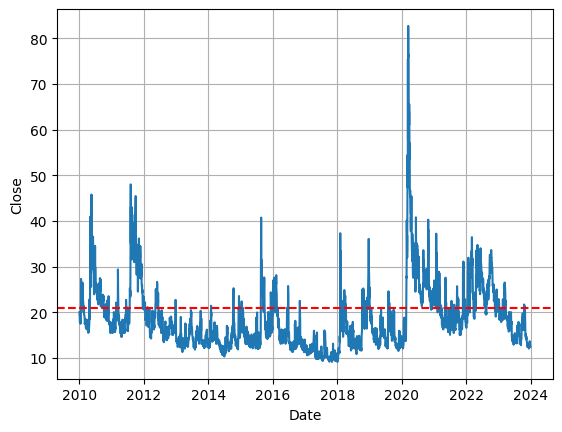

In [32]:
# Plotting the graph
plt.plot(VIX.index, VIX['Close'])

# Setting the x-axis label and y-axis label
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.axhline(y=21, color='r', linestyle='--')
# Displaying the graph
plt.show()

In [33]:
VTI.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03
mean,129.409594,130.087442,128.599952,129.408240,118.021962,2.969507e+06
std,53.662328,53.979033,53.302975,53.656783,56.782603,1.918709e+06
min,52.369999,52.689999,29.760000,52.080002,40.644608,3.519000e+05
25%,85.274998,85.700001,84.909998,85.307503,70.546656,1.814275e+06
50%,116.829998,117.074997,116.320000,116.739998,103.497402,2.531750e+06
75%,166.120003,166.685001,164.912502,166.142498,156.463879,3.508300e+06
max,243.729996,244.059998,242.429993,242.970001,238.250000,2.227240e+07


- - -

<img src="./19.png" height="600"/>

In [34]:
import pandas as pd
import numpy as np

def calculate_strategy(VTI, VIX):
    # 初始化變量
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    buy_trigger = 21
    last_vix = 0
    last_year = VTI.index[0].year
    last_year_cost = 0

    results = []

    # 遍歷每一天
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # 如果VIX超過21，則買入1000元的VTI
        if VIX[i] > buy_trigger:
            shares = 1000 / VTI[i]
            total_cost += 1000
            total_shares += shares

            # 每次VIX增加5就再買入1000
            if last_vix != 0 and VIX[i] - last_vix >= 5:
                shares = 1000 / VTI[i]
                total_cost += 1000
                total_shares += shares

            last_vix = VIX[i]

        # 如果VIX回到21，則重新下一輪
        elif VIX[i] <= 21:
            buy_trigger = 21
            last_vix = 0

        # 計算資產總額、總投入成本、持股總數、當年報酬率和總報酬率
        total_value = total_shares * VTI[i]
        annual_return = ((total_value - total_cost + last_year_cost) / (total_cost - last_year_cost) if total_cost != last_year_cost else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # 如果年份已經改變，則列印並重置變量
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            last_year_cost = total_cost

    # 加入最後一年的結果
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])

# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,172223.87,148000,2625.36,16.37,16.37
1,2011,308204.36,279000,4726.34,135.27,10.47
2,2012,389684.68,310000,5186.11,1157.05,25.70
3,2013,493095.82,310000,5186.11,0.00,59.06
4,2014,559129.83,319000,5278.79,6112.55,75.28
5,2015,576942.08,353000,5615.55,1596.89,63.44
6,2016,690734.77,385000,5944.36,2058.55,79.41
7,2017,821629.63,385000,5944.36,0.00,113.41
8,2018,806198.06,434000,6311.74,1545.30,85.76
9,2019,1049713.40,441000,6362.67,14895.91,138.03


In [53]:
def calculate_strategy(VTI, VIX):
    # 初始化變量
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    buy_trigger = 21
    last_vix = 0
    last_year = VTI.index[0].year
    total_value_start = 0

    results = []

    # 遍歷每一天
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # 如果VIX超過21，則買入1000元的VTI
        if VIX[i] > buy_trigger:
            shares = 1000 / VTI[i]
            total_cost += 1000
            total_shares += shares

            # 每次VIX增加5就再買入1000
            if last_vix != 0 and VIX[i] - last_vix >= 5:
                shares = 1000 / VTI[i]
                total_cost += 1000
                total_shares += shares

            last_vix = VIX[i]

        # 如果VIX回到21，則重新下一輪
        elif VIX[i] <= 21:
            buy_trigger = 21
            last_vix = 0

        # 計算資產總額、總投入成本、持股總數、當年報酬率和總報酬率
        total_value = total_shares * VTI[i]
        annual_return = ((total_value / total_value_start) - 1) * 100 if total_value_start != 0 else ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # 如果年份已經改變，則列印並重置變量
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            total_value_start = total_value

    # 加入最後一年的結果
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])


In [54]:
# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,172223.87,148000,2625.36,16.37,16.37
1,2011,308204.36,279000,4726.34,78.96,10.47
2,2012,389684.68,310000,5186.11,26.44,25.70
3,2013,493095.82,310000,5186.11,26.54,59.06
4,2014,559129.83,319000,5278.79,13.39,75.28
5,2015,576942.08,353000,5615.55,3.19,63.44
6,2016,690734.77,385000,5944.36,19.72,79.41
7,2017,821629.63,385000,5944.36,18.95,113.41
8,2018,806198.06,434000,6311.74,-1.88,85.76
9,2019,1049713.40,441000,6362.67,30.21,138.03


- - -

<img src="./18.png" height="600"/>

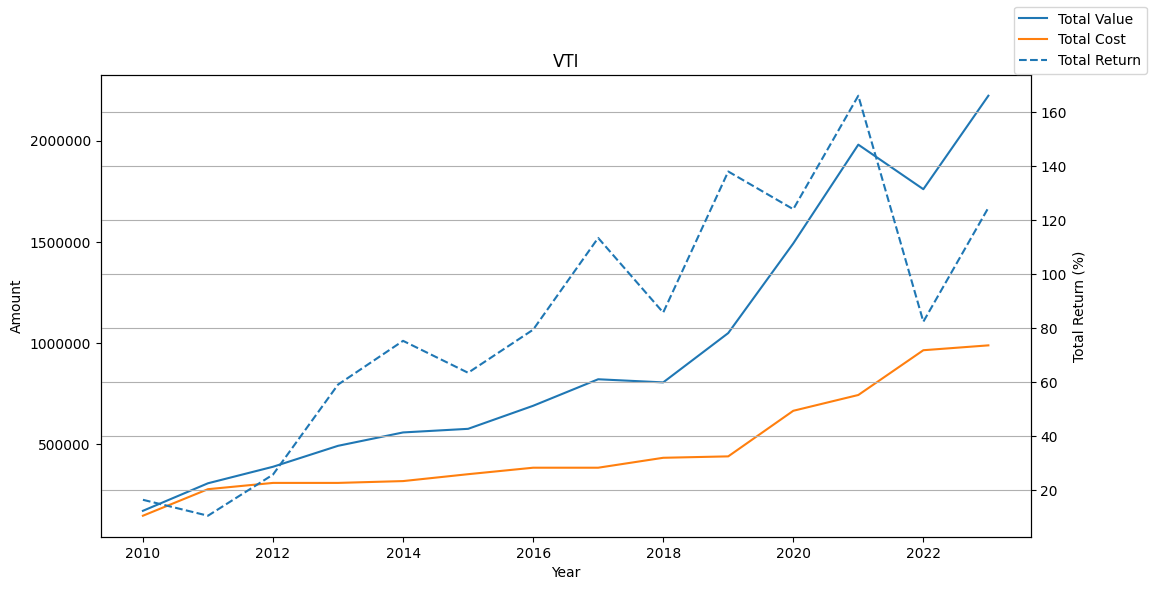

In [55]:
import matplotlib.pyplot as plt

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Value and Total Cost
ax1.plot(results['Year'], results['Total Value'], label='Total Value')
ax1.plot(results['Year'], results['Total Cost'], label='Total Cost')

# Setting the x-axis label and y-axis label for Total Value and Total Cost
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.ticklabel_format(style='plain')

# Creating the second y-axis for Total Return
ax2 = ax1.twinx()

# Plotting Total Return as a dashed line
ax2.plot(results['Year'], results['Total Return'], linestyle='--', label='Total Return')

# Setting the y-axis label for Total Return
ax2.set_ylabel('Total Return (%)')

# Setting the title
plt.title('VTI')

# Displaying the legend
fig.legend()
plt.grid(True)
# Displaying the graph
plt.show()


- - -

修改為VIX>30買入 VIX每增加5再買進

In [84]:
def calculate_strategy(VTI, VIX, buy_trigger, increment, buy_numbers=1000):
    # initialize variables
    total_cost = 0
    total_shares = 0
    total_value = 0
    annual_return = 0
    total_return = 0
    last_vix = 0
    last_year = VTI.index[0].year
    total_value_start = 0

    results = []

    # iterate over each day
    for i in range(len(VTI)):
        current_year = VTI.index[i].year

        # if VIX exceeds buy_trigger, buy VTI with buy_numbers
        if VIX[i] > buy_trigger:
            shares = buy_numbers / VTI[i]
            total_cost += buy_numbers
            total_shares += shares

            # double buy_numbers each time VIX increases
            if last_vix != 0 and VIX[i] - last_vix >= increment:
                #buy_numbers = buy_numbers + 1000
                shares = buy_numbers / VTI[i]
                total_cost += buy_numbers
                total_shares += shares

            last_vix = VIX[i]

        # if VIX returns to buy_trigger, reset for the next round
        elif VIX[i] <= buy_trigger:
            last_vix = 0

        # calculate total value, total cost, annual return, and total return
        total_value = total_shares * VTI[i]
        annual_return = ((total_value / total_value_start) - 1) * 100 if total_value_start != 0 else ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100
        total_return = ((total_value - total_cost) / total_cost if total_cost != 0 else 0) * 100

        # if the year has changed, print and reset variables
        if current_year != last_year:
            results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])
            last_year = current_year
            total_value_start = total_value

    # add the results for the last year
    results.append([last_year, total_value, total_cost, total_shares, annual_return, total_return])

    return pd.DataFrame(results, columns=['Year', 'Total Value', 'Total Cost', 'Cumulative Shares', 'Annual Return', 'Total Return'])


In [85]:
# 假設你已經有VTI和VIX的DataFrame
VTI_prices = VTI['Close']
VIX_values = VIX['Close']

results = calculate_strategy(VTI_prices, VIX_values, 30, 5)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,29686.67,25000,452.54,18.75,18.75
1,2011,113166.50,103000,1735.42,281.20,9.87
2,2012,130399.18,103000,1735.42,15.23,26.60
3,2013,165003.39,103000,1735.42,26.54,60.20
4,2014,183815.30,103000,1735.42,11.40,78.46
5,2015,182461.65,107000,1775.96,-0.74,70.52
6,2016,206366.01,107000,1775.96,13.10,92.87
7,2017,245472.56,107000,1775.96,18.95,129.41
8,2018,232935.03,113000,1823.65,-5.11,106.14
9,2019,300866.04,113000,1823.65,29.16,166.25


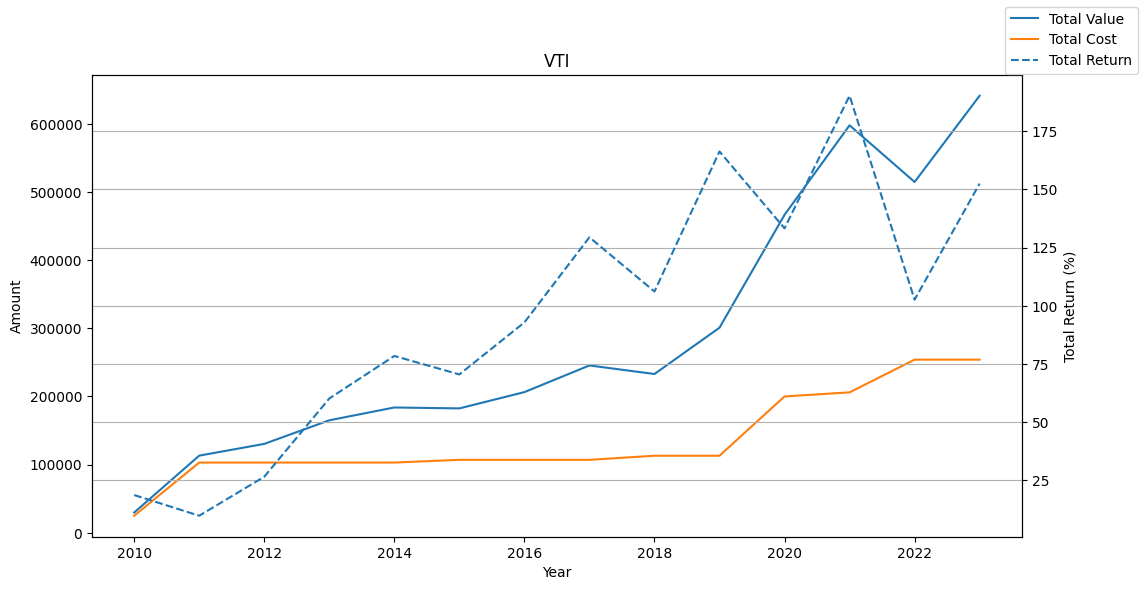

In [86]:
import matplotlib.pyplot as plt

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Value and Total Cost
ax1.plot(results['Year'], results['Total Value'], label='Total Value')
ax1.plot(results['Year'], results['Total Cost'], label='Total Cost')

# Setting the x-axis label and y-axis label for Total Value and Total Cost
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.ticklabel_format(style='plain')

# Creating the second y-axis for Total Return
ax2 = ax1.twinx()

# Plotting Total Return as a dashed line
ax2.plot(results['Year'], results['Total Return'], linestyle='--', label='Total Return')

# Setting the y-axis label for Total Return
ax2.set_ylabel('Total Return (%)')

# Setting the title
plt.title('VTI')

# Displaying the legend
fig.legend()
plt.grid(True)
# Displaying the graph
plt.show()


## QQQ

In [87]:
import yfinance as yf

# 下載VTI的數據
QQQ = yf.download('QQQ', start='2010-01-01',end='2023-12-31')
QQQ

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,46.33,46.49,46.27,46.42,40.79,62822800
2010-01-05,46.39,46.50,46.16,46.42,40.79,62935600
2010-01-06,46.40,46.55,46.07,46.14,40.54,96033000
2010-01-07,46.21,46.27,45.92,46.17,40.57,77094100
2010-01-08,46.07,46.55,45.93,46.55,40.90,88886600
...,...,...,...,...,...,...
2023-12-22,409.00,409.97,406.48,408.38,408.17,34292400
2023-12-26,409.25,411.56,409.15,410.88,410.66,22722500
2023-12-27,410.95,411.79,410.08,411.50,411.50,31980500


In [88]:
# 假設你已經有VTI和VIX的DataFrame
QQQ_prices = QQQ['Close']
VIX_values = VIX['Close']

# 設定你的buy_trigger和increment
my_buy_trigger = 30
my_increment = 5

results = calculate_strategy(QQQ_prices, VIX_values, my_buy_trigger, my_increment)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2010,30845.53,25000,557.68,23.38,23.38
1,2011,113197.50,103000,1989.41,266.98,9.90
2,2012,133688.42,103000,1989.41,18.10,29.79
3,2013,173615.91,103000,1989.41,29.87,68.56
4,2014,204789.99,103000,1989.41,17.96,98.83
5,2015,222215.39,107000,2029.36,8.51,107.68
6,2016,242590.21,107000,2029.36,9.17,126.72
7,2017,321633.96,107000,2029.36,32.58,200.59
8,2018,320520.79,113000,2069.48,-0.35,183.65
9,2019,447338.42,113000,2069.48,39.57,295.87


# NVDA

In [89]:
from datetime import date
start_date = '2020-01-01'
today = date.today()
NVDA = yf.download('NVDA', start=start_date,end=today)
NVDA

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.69,59.98,59.18,59.98,59.74,23753600
2020-01-03,58.78,59.46,58.53,59.02,58.79,20538400
2020-01-06,58.08,59.32,57.82,59.26,59.03,26263600
2020-01-07,59.55,60.44,59.10,59.98,59.75,31485600
2020-01-08,59.94,60.51,59.54,60.10,59.86,27710800
...,...,...,...,...,...,...
2024-02-26,797.00,806.46,785.05,790.92,790.92,50397300
2024-02-27,793.81,794.80,771.62,787.01,787.01,39170500
2024-02-28,776.20,789.33,771.25,776.63,776.63,39311000


In [90]:
# 下載VTI的數據
VIX = yf.download('^VIX', start=start_date,end=today)
VIX

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.46,13.72,12.42,12.47,12.47,0
2020-01-03,15.01,16.20,13.13,14.02,14.02,0
2020-01-06,15.45,16.39,13.54,13.85,13.85,0
2020-01-07,13.84,14.46,13.39,13.79,13.79,0
2020-01-08,15.16,15.24,12.83,13.45,13.45,0
...,...,...,...,...,...,...
2024-02-26,14.17,14.20,13.66,13.74,13.74,0
2024-02-27,13.63,13.75,13.41,13.43,13.43,0
2024-02-28,13.52,13.90,13.44,13.84,13.84,0


In [91]:
# 假設你已經有VTI和VIX的DataFrame
NVDA_prices = NVDA['Close']
VIX_values = VIX['Close']

# 設定你的buy_trigger和increment
my_buy_trigger = 30
my_increment = 5

results = calculate_strategy(NVDA_prices, VIX_values, my_buy_trigger, my_increment)

# 設定顯示選項
pd.set_option('display.float_format', '{:.2f}'.format)

results

,Year,Total Value,Total Cost,Cumulative Shares,Annual Return,Total Return
0,2020,154457.60,87000,1177.85,77.54,77.54
1,2021,365954.36,93000,1214.95,136.93,293.50
2,2022,216314.93,141000,1511.11,-40.89,53.41
3,2023,727869.90,141000,1511.11,236.49,416.22
4,2024,1243323.51,141000,1511.11,70.82,781.79
